In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

In [5]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [1]:
# Deciding which version of the ad will be the most effective -> The ad that will get the most clicks.
# Every time a user goes online the user is shown an ad. The algorith decides what ad is shown to the user. Observe (count) the clicks or response rates.
# reward = 1 if clicked rewared = 0 if not clicked

Implementing UCB

In [34]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

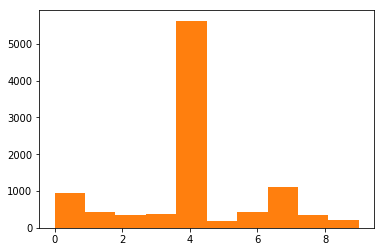

In [37]:
plt.hist(ads_selected)
plt.show()